# Práctica #7

In [93]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv('../Analysis/team_stats_by_year.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

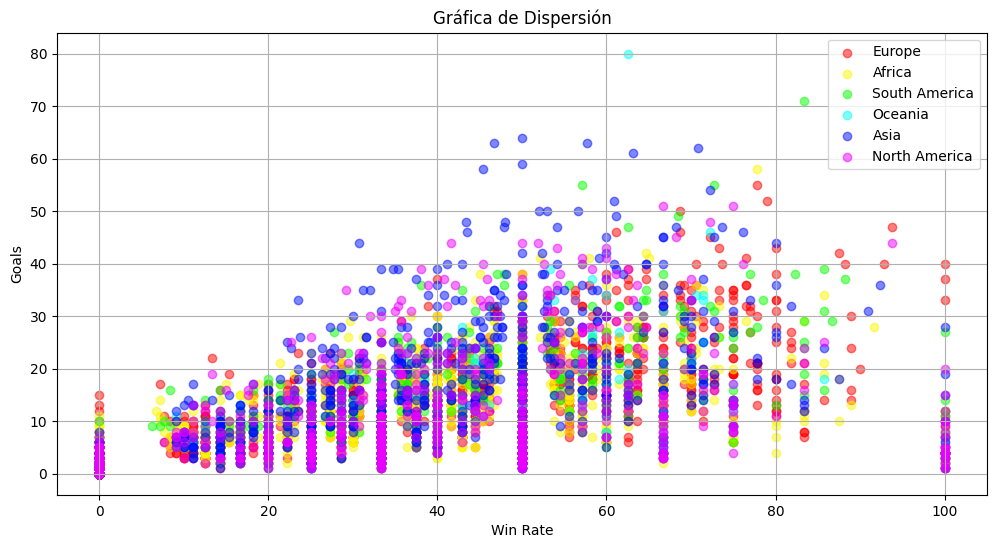

In [94]:
def get_cmap(n, name="hsv"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return plt.cm.get_cmap(name, n)

def data_dispersion(labelx, labely, df):
  continents = df['Continent'].unique()
  cmap = get_cmap(len(continents) + 1)
  plt.figure(figsize=(12, 6))
  for i, continent in enumerate(continents):
      subset = df[df['Continent'] == continent]
      plt.scatter(subset[labelx], subset[labely], label=continent, color=cmap(i), alpha=0.5)
  plt.legend()
  plt.title('Gráfica de Dispersión')
  plt.xlabel('Win Rate')
  plt.ylabel('Goals')
  plt.grid(True)
  plt.show()

data_dispersion('Win Rate', 'Goals', df)

In [95]:
def prediction(categories, newTeam, df):
  x_train = df[categories]
  y_train = df['Continent']
  # Crea el modelo k nearest neightbors con un valor de k deseado
  knn_model = KNeighborsClassifier(n_neighbors=5)
  # Entrena el modelo
  knn_model.fit(x_train, y_train)
  # Realiza la predicción
  genre_predict = knn_model.predict(newTeam)
  print(f"El continente del nuevo equipo es: {genre_predict[0]}")

categories = ['Win Rate', 'Goals']
newTeam = [[50, 60]]
prediction(categories, newTeam, df)

El continente del nuevo equipo es: Asia
